# 영상 데이터 분류 by 전이학습 template

# 데이터 준비


<br>

데이터는 다음과 같이 구성됨

```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
        class3/
            file31.jpg
            file32.jpg
             ...
        ...
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...    
        class3/
            file38.jpg
            file39.jpg
             ...
        ...
    
```

In [2]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/keras_howto_2021/raw/master/data/dogs_prepared.tar.gz
!ls -al  

--2021-12-09 10:36:15--  https://github.com/dhrim/keras_howto_2021/raw/master/data/dogs_prepared.tar.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/dogs_prepared.tar.gz [following]
--2021-12-09 10:36:15--  https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   219MB/s    in 0.3s    

2021-12-09 10:36:17 (219 MB/s) - ‘dogs_prepared.tar.gz’ saved

In [3]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

# Template

- Keras 표준 폴더 구조로 영상 파일을 준비
- 전이학습을 사용
- 입력층 노드 모양은 (224,224,3)
- 출력층 노드 개수는 카테고리 수
- 출력층 활성화 함수는 softmax
- 사용하는 loss는 ‘sparse_categorical_crossentropy’


31801344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten (Flatten)           (None, 68992)             0         
                                                                 
 dense (Dense)               (None, 256)               17662208  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 25,434,371
Trainable params: 17,665,290
Non

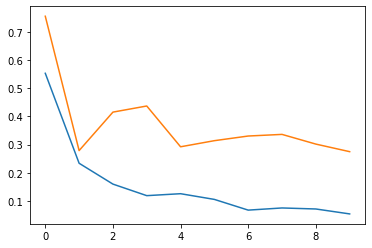

7/7 [==============================] - 2s 205ms/step - loss: 0.2747 - acc: 0.9433
loss= 0.2746824026107788
acc= 0.9432989954948425


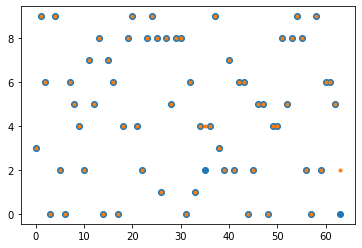

label category index = 3.0
predicted category index = 3
predicted category name = n02086079-Pekinese


In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax')) # 수정할 곳. 노드수를 카테고리 수로 설정.

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "dogs_prepared/train", # 수정할 곳. 학습 데이터 폴더
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "dogs_prepared/test", # 수정할 곳. 평가 데이터 폴더
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,   
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(
      test_data_generator,
)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = next(iter(test_data_generator))
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# Template 상세

## 임포팅

In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

## 전이학습 대상 모델 로딩

In [6]:
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

## 모델 정의


In [7]:
model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax')) # 수정할 곳. 노드수를 카테고리 수로 설정.

## loss, optimizer 설정

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])

## 모델 보기

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_1 (Flatten)         (None, 68992)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               17662208  
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 25,434,371
Trainable params: 17,665,290
Non-trainable params: 7,769,081
__________________________________

## batch size 정의

In [10]:
BATCH_SIZE = 64

## train 데이터 로딩과 증강

In [11]:
train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "dogs_prepared/train", # 수정할 곳. 학습 데이터 폴더
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

Found 1531 images belonging to 10 classes.


## test 데이터 로딩과 증강

In [12]:
test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "dogs_prepared/test", # 수정할 곳. 평가 데이터 폴더
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


Found 388 images belonging to 10 classes.


## 모델 학습

In [13]:
history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,   
      epochs=10
)

Epoch 1/10
24/24 [==============================] - 29s 920ms/step - loss: 0.5640 - acc: 0.8406 - val_loss: 0.4835 - val_acc: 0.9149
Epoch 2/10
24/24 [==============================] - 20s 849ms/step - loss: 0.2088 - acc: 0.9340 - val_loss: 0.4993 - val_acc: 0.8943
Epoch 3/10
24/24 [==============================] - 20s 848ms/step - loss: 0.1698 - acc: 0.9438 - val_loss: 0.3281 - val_acc: 0.9227
Epoch 4/10
24/24 [==============================] - 20s 841ms/step - loss: 0.1334 - acc: 0.9562 - val_loss: 0.2043 - val_acc: 0.9459
Epoch 5/10
24/24 [==============================] - 20s 844ms/step - loss: 0.1343 - acc: 0.9569 - val_loss: 0.2287 - val_acc: 0.9381
Epoch 6/10
24/24 [==============================] - 20s 843ms/step - loss: 0.1070 - acc: 0.9628 - val_loss: 0.2823 - val_acc: 0.9201
Epoch 7/10
24/24 [==============================] - 20s 841ms/step - loss: 0.0588 - acc: 0.9804 - val_loss: 0.2530 - val_acc: 0.9330
Epoch 8/10
24/24 [==============================] - 20s 833ms/step - 

## loss  그리기

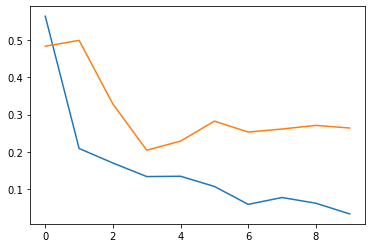

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 평가

In [15]:
loss, acc = model.evaluate(
      test_data_generator,
)
print("loss=", loss)
print("acc=", acc)

7/7 [==============================] - 2s 215ms/step - loss: 0.2638 - acc: 0.9510
loss= 0.26380017399787903
acc= 0.9510309100151062


## 예측

In [16]:
test_x, test_y = next(iter(test_data_generator))
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

## 영상 분류 결과 그리기

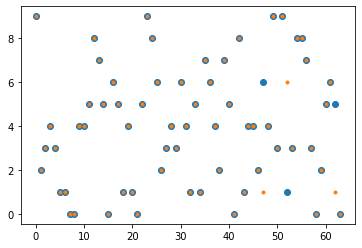

label category index = 9.0
predicted category index = 9
predicted category name = n02088094-Afghan_hound


In [17]:
plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])